In [9]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

csvpath = os.path.join("../project_1/California_Fire_Incidents.csv")
calfire = pd.read_csv(csvpath)

# Set display options to show all columns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

calfire.head(2)


AcresBurned  Active                                          AdminUnit  \
0     257314.0   False  Stanislaus National Forest/Yosemite National Park   
1      30274.0   False  USFS Angeles National Forest/Los Angeles Count...   

   AirTankers  ArchiveYear  CalFireIncident  \
0         NaN         2013             True   
1         NaN         2013             True   

                            CanonicalUrl ConditionStatement ControlStatement  \
0         /incidents/2013/8/17/rim-fire/                NaN              NaN   
1  /incidents/2013/5/30/powerhouse-fire/                NaN              NaN   

      Counties CountyIds  CrewsInvolved  Dozers  Engines  \
0     Tuolumne        55            NaN     NaN      NaN   
1  Los Angeles        19            NaN     NaN      NaN   

           Extinguished  Fatalities  Featured  Final FuelType  Helicopters  \
0  2013-09-06T18:30:00Z         NaN     False   True      NaN          NaN   
1  2013-06-08T18:30:00Z         NaN     False   True      NaN          NaN   

   Injuries   Latitude                                 Location   Longitude  \
0       NaN  37.857000  3 miles east of Groveland along Hwy 120 -120.086000   
1       NaN  34.585595                  Angeles National Forest -118.423176   

   MajorIncident             Name  PercentContained  PersonnelInvolved  \
0          False         Rim Fire             100.0                NaN   
1          False  Powerhouse Fire             100.0                NaN   

   Public                                  SearchDescription  \
0    True  The Rim Fire was east of Groveland along Highw...   
1    True  The Powerhouse Fire burned in May and June 201...   

                                      SearchKeywords               Started  \
0  Rim Fire, Stanislaus National Forest, Yosemite...  2013-08-17T15:25:00Z   
1  Powerhouse Fire, May 2013, June 2013, Angeles ...  2013-05-30T15:28:00Z   

      Status  StructuresDamaged  StructuresDestroyed  StructuresEvacuated  \
0  Finalized                NaN                  NaN                  NaN   
1  Finalized                NaN                  NaN                  NaN   

   StructuresThreatened                              UniqueId  \
0                   NaN  5fb18d4d-213f-4d83-a179-daaf11939e78   
1                   NaN  bf37805e-1cc2-4208-9972-753e47874c87   

                Updated  WaterTenders  
0  2013-09-06T18:30:00Z           NaN  
1  2013-06-08T18:30:00Z           NaN

In [7]:
#clean the data
columns_to_drop = ['Active','Featured', 'Final', 'PercentContained','Public', 'SearchKeywords', 'Status']
calfire.drop(columns_to_drop, axis='columns', inplace=True)
calfire['Started'] = pd.to_datetime(calfire['Started'])
calfire['Updated'] = pd.to_datetime(calfire['Updated'])
calfire['Extinguished'] = pd.to_datetime(calfire['Extinguished'])

calfire['YearStarted'] = calfire['Started'].dt.year
calfire['MonthStarted'] = calfire['Started'].dt.month
calfire = calfire[calfire.YearStarted != 1969]
calfire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)
calfire['AcresBurned'] = calfire['AcresBurned'].astype('int64')
calfire['AirTankers'] = calfire['AirTankers'].astype('int64')
calfire['CrewsInvolved'] = calfire['CrewsInvolved'].astype('int64')
calfire['Dozers'] = calfire['Dozers'].astype('int64')
calfire['Engines'] = calfire['Engines'].astype('int64')
calfire['Fatalities'] = calfire['Fatalities'].astype('int64')
calfire['Injuries'] = calfire['Injuries'].astype('int64')
calfire['Helicopters'] = calfire['Helicopters'].astype('int64')
calfire['PersonnelInvolved'] = calfire['PersonnelInvolved'].astype('int64')
calfire['StructuresDamaged'] = calfire['StructuresDamaged'].astype('int64')
calfire['StructuresDestroyed'] = calfire['StructuresDestroyed'].astype('int64')
calfire['StructuresEvacuated'] = calfire['StructuresEvacuated'].astype('int64')
calfire['StructuresThreatened'] = calfire['StructuresThreatened'].astype('int64')
calfire['WaterTenders'] = calfire['WaterTenders'].astype('int64')

AcresBurned  Active                                          AdminUnit  \
0        257314.0   False  Stanislaus National Forest/Yosemite National Park   
1         30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2         27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3         27440.0   False                              Tahoe National Forest   
4         24251.0   False                       Ventura County Fire/CAL FIRE   
5         22992.0   False                             Sierra National Forest   
6         20292.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
7         14754.0   False                            Klamath National Forest   
8         12503.0   False                         Six Rivers National Forest   
9         11429.0   False                         CAL FIRE Tehama-Glenn Unit   
10         8073.0   False                       CAL FIRE Shasta-Trinity Unit   
11         7055.0   False  CAL FIRE San Diego Unit / Cleveland National F...   
12         6965.0   False                                CAL FIRE Butte Unit   
13         4346.0   False         CAL FIRE / USFS Los Padres National Forest   
14         4346.0   False         CAL FIRE / USFS Los Padres National Forest   
15         3505.0   False                     CAL FIRE Sonoma-Lake-Napa Unit   
16         3166.0   False                    CAL FIRE/Riverside County Fire    
17         3111.0   False                          CAL FIRE Santa-Clara Unit   
18         2781.0   False                            CAL FIRE San Diego Unit   
19         2462.0   False                                CAL FIRE Butte Unit   
20         2236.0   False                   Camp Pendleton Marine Corps Base   
21         2060.0   False                            Sequoia National Forest   
22         1984.0   False                    USFS Los Padres National Forest   
23         1708.0   False  CAL FIRE Madera-Mariposa-Merced Unit / Sierra ...   
24         1383.0   False  Cleveland National Forest / CAL FIRE Riverside...   
25         1271.0   False                            CAL FIRE San Diego Unit   
26         1070.0   False                         Stanislaus National Forest   
27          917.0   False  Los Padres National Forest / CAL FIRE San Beni...   
28          794.0   False                            Sequoia National Forest   
29          712.0   False  CAL FIRE / Kern County Fire / State Parks / US...   
30          712.0   False                       CAL FIRE/Los Angeles County    
31          612.0   False                                   Kern County Fire   
32          572.0   False                           Eldorado National Forest   
33          534.0   False  CAL FIRE San Bernardino Unit/ City of Redlands...   
34          513.0   False                             Plumas National Forest   
35          510.0   False                     CAL FIRE/Riverside County Fire   
36          502.0   False                         CAL FIRE Lassen-Modoc Unit   
37          500.0   False                         Los Padres National Forest   
38          492.0   False                          CAL FIRE Santa Clara Unit   
39          482.0   False               CAL FIRE Madera-Mariposa-Merced Unit   
40          413.0   False                     San Bernardino National Forest   
41          406.0   False                       CAL FIRE San Bernardino Unit   
42          376.0   False                     CAL FIRE Sonoma-Lake-Napa Unit   
43          354.0   False                      CAL FIRE San Benito-Monterey    
44          311.0   False                   CAL FIRE / Riverside County Fire   
45          305.0   False                                CAL FIRE Butte Unit   
46          303.0   False                  CAL FIRE Tuolumne-Calaveras Unit    
47          298.0   False                                CAL FIRE Butte Unit   
48          296.0   False                     CAL FIRE Sonoma-Lake-Napa Unit   
49    

In [2]:
# 1 Calculate the average burned area per firefighter : AcresBurned	/ PersonnelInvolved	

acres_per_firefighter = fires_df['AcresBurned'] / fires_df['PersonnelInvolved']
acres_per_firefighter

0             NaN
1             NaN
2             NaN
3             NaN
4       11.191048
          ...    
1631          NaN
1632          NaN
1633          NaN
1634          NaN
1635          NaN
Length: 1636, dtype: float64

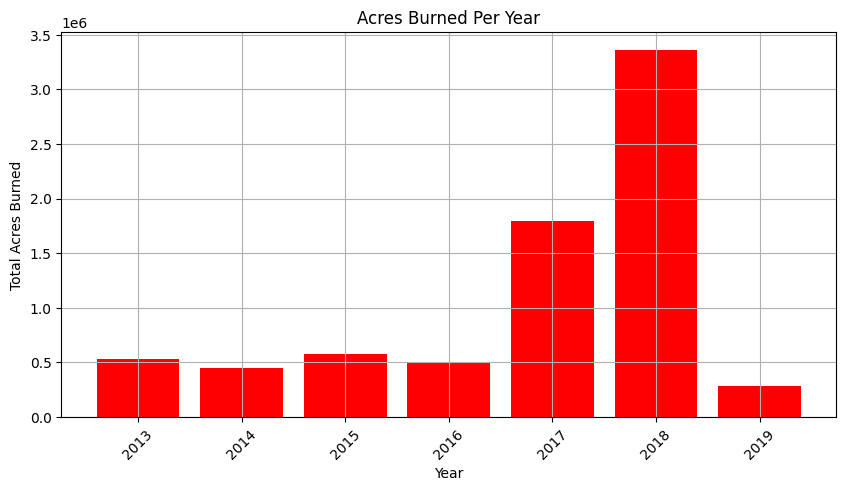

In [15]:
burns_by_year = fires_df.groupby('ArchiveYear')['AcresBurned'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(burns_by_year["ArchiveYear"],burns_by_year["AcresBurned"], color = 'red')
plt.title('Acres Burned Per Year')
plt.xlabel('Year')
plt.ylabel('Total Acres Burned')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [8]:
result_df = pd.DataFrame({
    'AdminUnit': fires_df['AdminUnit'],
    'ArchiveYear': fires_df['ArchiveYear'],
    'acres_per_firefighter': acres_per_firefighter
})
result_df

AdminUnit  ArchiveYear  \
0     Stanislaus National Forest/Yosemite National Park         2013   
1     USFS Angeles National Forest/Los Angeles Count...         2013   
2     CAL FIRE Riverside Unit / San Bernardino Natio...         2013   
3                                 Tahoe National Forest         2013   
4                          Ventura County Fire/CAL FIRE         2013   
...                                                 ...          ...   
1631                   CAL FIRE / Riverside County Fire         2019   
1632                  CAL FIRE Nevada-Yuba-Placer Unit          2019   
1633               Yolo County Fire Protection District         2019   
1634                   Camp Pendleton Marine Corps Base         2019   
1635                           Bureau of Indian Affairs         2019   

      acres_per_firefighter  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                 11.191048  
...                     ...  
1631                    NaN  
1632                    NaN  
1633                    NaN  
1634                    NaN  
1635                    NaN  

[1636 rows x 3 columns]